## Number of possible chords 

Let's see the number of possible chords

**We have 12 possible roots**

In [1]:
possible_notes = list(range(0,12))
possible_notes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

We have the following qualities

In [2]:
from pychord_jl.constants import QUALITY_DICT

In [3]:
QUALITY_DICT

OrderedDict([('3', (0, 4)),
             ('5', (0, 7)),
             ('-5', (0, 7)),
             ('sus', (0, 7)),
             ('', (0, 4, 7)),
             ('maj', (0, 4, 7)),
             ('M', (0, 4, 7)),
             ('m', (0, 3, 7)),
             ('min', (0, 3, 7)),
             ('mi', (0, 3, 7)),
             ('dim', (0, 3, 6)),
             ('b5', (0, 3, 6)),
             ('o', (0, 3, 6)),
             ('aug', (0, 4, 8)),
             ('(aug)', (0, 4, 8)),
             ('+5', (0, 4, 8)),
             ('+', (0, 4, 8)),
             ('sus2', (0, 2, 7)),
             ('(sus2)', (0, 2, 7)),
             ('sus4', (0, 5, 7)),
             ('(sus4)', (0, 5, 7)),
             ('s4', (0, 5, 7)),
             ('6', (0, 4, 7, 9)),
             ('add6', (0, 4, 7, 9)),
             ('7', (0, 4, 7, 10)),
             ('(7)', (0, 4, 7, 10)),
             ('(M7)', (0, 4, 7, 10)),
             ('7-5', (0, 4, 6, 10)),
             ('7_5', (0, 4, 6, 10)),
             ('7b5', (0, 4, 6, 10)),
    

In [4]:
len(QUALITY_DICT.keys())

135

In [5]:
unique_qualities = {}
for key,value in QUALITY_DICT.items():
    if value not in unique_qualities.values():
        unique_qualities[key] = value    

In [6]:
len(unique_qualities)

67

**We have 67 possible qualities**

**We have 12 possible slashes**

In [7]:
67 * 12 * 12

9648

We are not going no consider slashes

In [8]:
67 * 12

804

## Feature encoding 

Embedding vs One Shot Encoding vs Manual.

A chord can contain notes. There are 12 possible notes. So we are going to encode it as a vector of 12 positions (0 if the note does not exist, 1 if the note does exists)

In [9]:
from music21.stream import Stream
from music21.note import Note
from music21.meter import TimeSignature
from music21.clef import TrebleClef
from music21.text import TextBox
from music21.chord import Chord
from music21.interval import Interval

from jl_chord_parser import ChordParser

In [28]:
def clone_chord(chord):
    return Chord(chord.notes)

def to_chord(components):
    return Chord(notes=components, type='whole')

def show_and_listen(chord_str):
    parser = ChordParser()
    extended_chord = parser.parse(chord_str)
    chord = to_chord(extended_chord.components)
    stream = Stream()
    stream.append(chord)
    stream.append(clone_chord(chord)) # Due to a Music21 issue
    print(f'Note vector: {extended_chord.note_vector}')
    print(chord)
    chord.show()
    stream.show('midi')

Note vector: [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
<music21.chord.Chord C E G>


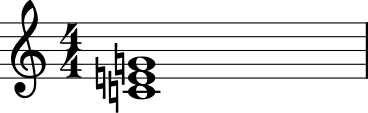

In [29]:
show_and_listen('C')

Note vector: [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
<music21.chord.Chord C G>


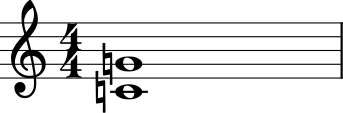

In [30]:
show_and_listen('C5')

Note vector: [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
<music21.chord.Chord C E- G->


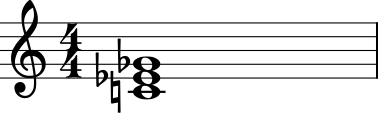

In [31]:
show_and_listen('Co')

Note vector: [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]
<music21.chord.Chord A C E G>


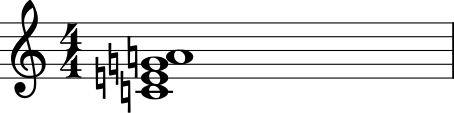

In [32]:
show_and_listen('Am7')